In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img=cv2.imread('/home/srinivasan/Downloads/elephant.jpg')

In [3]:
cv2.imshow("Frame",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
all_pixels=img.reshape(-1,3)
print(all_pixels.shape)

(1132200, 3)


In [5]:
dominant_colors=int(input("Enter no of dominant colors: "))
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

Enter no of dominant colors: 3


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centers=km.cluster_centers_
centers=np.array(centers,dtype='uint8') 

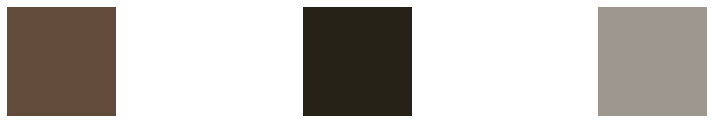

In [7]:
i=1
plt.figure(0,figsize=(15,2))
colors=[]
for c in centers:
    plt.subplot(1,dominant_colors,i) 
    plt.axis("off") 
    colors.append(c)
    a=np.zeros((100,100,3),dtype= 'uint8') 
    a[:,:,:]=c
    plt.imshow(a)
    i+=1
plt.show()

In [8]:
new_img=np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')

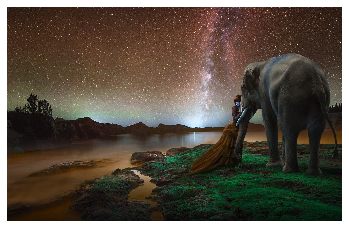

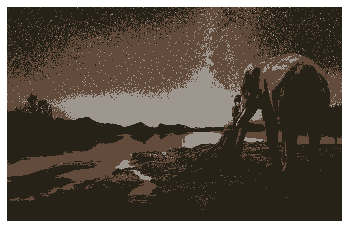

In [9]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
new_img=new_img.reshape((img.shape))

# Original Image
plt.imshow(img)
plt.axis("off")
plt.show()

# Segmented Image

plt.imshow(new_img)
plt.axis("off")
plt.show()